# Actividad semana 3

### 1. Abrir el conjunto de datos Enfermedad Cardiovascular con ayuda de la librería Pandas utilizando un cuaderno nuevo de Pyth

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('cardio_train.csv', sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# id: ID number
# age: in days
# gender: 1 - women, 2 - men
# height: cm
# weight: kg
# ap_hi: Systolic blood pressure
# ap_lo: Diastolic blood pressure
# cholesterol: 1: normal, 2: above normal, 3: well above normal
# gluc1: normal, 2: above normal, 3: well above normal
# smoke: whether patient smokes or not
# alco: Binary feature
# active: Binary feature
# cardio: Target variable

### 2. Preparar los datos utilizando las variables Dummy para representar las columnas que tengan variables donde existan dos o más categorías diferentes. Recuerda, para que sea posible trabajar con los modelos todas las variables deben de ser numéricas.

In [3]:
# nuestra variable dependiente será si sufrirá o no de problemas cardiovasculares, es decir, la variable 'cardio' 
# será nuestra 'y'

In [4]:
df['gender'] = df['gender'].replace(1, 'women').replace(2, 'men')
df['cholesterol'] = df['cholesterol'].replace(1, 'normal').replace(2, 'above normal').replace(3, 'well above normal')
df['gluc'] = df['gluc'].replace(1, 'normal').replace(2, 'above normal').replace(3, 'well above normal')
df['smoke'] = df['smoke'].replace(0, 'no').replace(1, 'si')
df['alco'] = df['alco'].replace(0, 'no').replace(1, 'si')
df['active'] = df['active'].replace(0, 'no').replace(1, 'si')

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,men,168,62.0,110,80,normal,normal,no,no,si,0
1,1,20228,women,156,85.0,140,90,well above normal,normal,no,no,si,1
2,2,18857,women,165,64.0,130,70,well above normal,normal,no,no,no,1
3,3,17623,men,169,82.0,150,100,normal,normal,no,no,si,1
4,4,17474,women,156,56.0,100,60,normal,normal,no,no,no,0


In [6]:
df.shape

(70000, 13)

In [7]:
# Vemos que las columnas categóricas son 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', active' y 'cardio'
# Creo una serie con esos elementos y se lo paso al df para filtrar por dummy
columns_to_dummy = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
columns_to_dummy

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

In [8]:
df_dummy = pd.get_dummies(df, prefix=columns_to_dummy)
df_dummy.head()

,id,age,height,weight,ap_hi,ap_lo,cardio,gender_men,gender_women,cholesterol_above normal,...,cholesterol_well above normal,gluc_above normal,gluc_normal,gluc_well above normal,smoke_no,smoke_si,alco_no,alco_si,active_no,active_si
0,0,18393,168,62.0,110,80,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
1,1,20228,156,85.0,140,90,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
2,2,18857,165,64.0,130,70,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,3,17623,169,82.0,150,100,1,1,0,0,...,0,0,1,0,1,0,1,0,0,1
4,4,17474,156,56.0,100,60,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0


In [9]:
df_dummy.shape

(70000, 21)

In [10]:
df_dummy.columns

Index(['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio',
       'gender_men', 'gender_women', 'cholesterol_above normal',
       'cholesterol_normal', 'cholesterol_well above normal',
       'gluc_above normal', 'gluc_normal', 'gluc_well above normal',
       'smoke_no', 'smoke_si', 'alco_no', 'alco_si', 'active_no', 'active_si'],
      dtype='object')

In [11]:
# quitamos la primera columna de los campos 'repetidos'
df_dummy = pd.get_dummies(df, prefix=columns_to_dummy, drop_first=True)
df_dummy.head()

,id,age,height,weight,ap_hi,ap_lo,cardio,gender_women,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal,smoke_si,alco_si,active_si
0,0,18393,168,62.0,110,80,0,0,1,0,1,0,0,0,1
1,1,20228,156,85.0,140,90,1,1,0,1,1,0,0,0,1
2,2,18857,165,64.0,130,70,1,1,0,1,1,0,0,0,0
3,3,17623,169,82.0,150,100,1,0,1,0,1,0,0,0,1
4,4,17474,156,56.0,100,60,0,1,1,0,1,0,0,0,0


### 3. Identificar, dentro del nuevo conjunto de datos, cuáles son las características más relevantes que impactan más en el resultado. Debes utilizar la librería “sklearn.feature_selection” para realizar este paso.

In [37]:
# Pasamos a 'X' todas las variables independiente
X = df_dummy.drop("cardio", axis=1)
# Pasamos a 'y' la variable dependiente
y = df_dummy.cardio

X.head()

,id,age,height,weight,ap_hi,ap_lo,gender_women,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal,smoke_si,alco_si,active_si
0,0,18393,168,62.0,110,80,0,1,0,1,0,0,0,1
1,1,20228,156,85.0,140,90,1,0,1,1,0,0,0,1
2,2,18857,165,64.0,130,70,1,0,1,1,0,0,0,0
3,3,17623,169,82.0,150,100,0,1,0,1,0,0,0,1
4,4,17474,156,56.0,100,60,1,1,0,1,0,0,0,0


In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Escalamos nuestros datos
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=103)

In [15]:
df_dummy.shape

(70000, 15)

In [16]:
X.shape

(70000, 14)

In [17]:
y.shape

(70000, 1)

In [18]:
# Recursive Feature Elimination o eliminacion de caracteristicas recursivas
from sklearn.feature_selection import RFE

# creamos nuestro modelo de estimacion
estimator = LogisticRegression(solver='lbfgs')

# le pasamos nuestro modelo de estimacion
selector = RFE(estimator, 3, step=1)

selector = selector.fit(X_train, y_train.ravel())

C:\Users\ChMp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ChMp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ChMp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ChMp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\ChMp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

### 4. Utilizando la instrucción “print”, mostrar el ranking de cuales son las variables más importantes identificadas en el punto anterior. Posteriormente analizar los resultados y escribir tus conclusiones del por qué estas variables impactan más que otras.

In [45]:
print(selector.support_)
print(selector.ranking_)
X.columns.values
print("\n")
for index in range(len(X.columns.values)):
    print(str(X.columns.values[index]) + " - " + str(selector.ranking_[index]))

[False False False  True  True  True False False False False False False
 False False]
[12  2  3  1  1  1 11  5  4  9  6 10  8  7]


id - 12
age - 2
height - 3
weight - 1
ap_hi - 1
ap_lo - 1
gender_women - 11
cholesterol_normal - 5
cholesterol_well above normal - 4
gluc_normal - 9
gluc_well above normal - 6
smoke_si - 10
alco_si - 8
active_si - 7


Según el resultado las 3 variables que más impactan que un paciente tenga una cariopatía son: weight, ap_hi, 
ap_lo, es decir, el peso, la presión arterial sistólica y la presión arterial diastólica que sin ser por mi parte muy dicho en estas materias médicas, igualmente creo que tiene mucho sentido que estas variables tengan mucha prevalencia en una cardiopatía.

### 5. Crear un modelo de regresión logística que represente a nuestro conjunto de datos.
### 6. Evaluar el modelo usando una curva ROC
### 7. Evaluar el modelo usando una curva CAP.

Undersampling

In [806]:
df_no = df[df['cardio'] == 0]
df_yes = df[df['cardio'] == 1]
# reducimos el tamaño de datos a usar de 'no' igualandolo al de los 'si'
df_no_reduced = df_no.sample(df_yes.shape[0],random_state=103)
df_reduced = pd.concat([df_no_reduced,df_yes],axis=0)
# mezclamos los datos y dando el parámetro frac=1 para indicar que el número de datos sea el mismo
df_reduced = df_reduced.sample(frac=1,random_state=103)
df_reduced.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
22105,31576,16712,men,163,67.0,110,80,normal,normal,no,no,no,1
25111,35854,16801,women,151,52.0,180,90,above normal,above normal,no,no,no,0
21491,30701,15304,women,157,55.0,120,80,normal,normal,no,no,si,0
65034,92820,20476,women,155,100.0,160,80,normal,above normal,no,no,no,1
55288,78867,20427,men,164,72.0,130,90,above normal,normal,no,no,si,0


In [807]:
df_reduced.cardio.value_counts()

1    34979
0    34979
Name: cardio, dtype: int64

## Variable 'weight'

Spliting

In [808]:
# Tomamos primero la columna con los datos del peso
X = df_reduced['weight'].values.reshape(-1, 1)
y = df_reduced['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=103)

Score train:  0.5758144695013975
Score test:  0.5763849785593624
Probabilidades:  [0.54832164 0.50812059 0.54165091 ... 0.59440344 0.21205725 0.53496522]


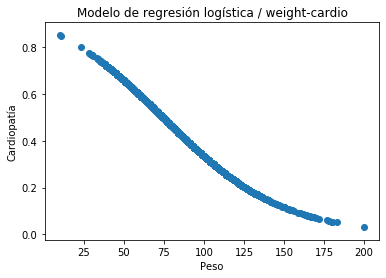

In [809]:
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

print("Score train: ", clf.score(X_train,y_train))
print("Score test: ", clf.score(X_test,y_test))
pro = clf.predict_proba(X_train)[:,0]
print("Probabilidades: ", pro)

import matplotlib.pyplot as plt
plt.scatter(X_train,pro);
plt.title('Modelo de regresión logística / weight-cardio')
plt.xlabel('Peso')
plt.ylabel('Cardiopatía')

plt.savefig("weight_regression.png")

accuracy_score:  0.5763849785593624
              precision    recall  f1-score   support

           0       0.57      0.64      0.60     11507
           1       0.59      0.51      0.55     11580

    accuracy                           0.58     23087
   macro avg       0.58      0.58      0.57     23087
weighted avg       0.58      0.58      0.57     23087



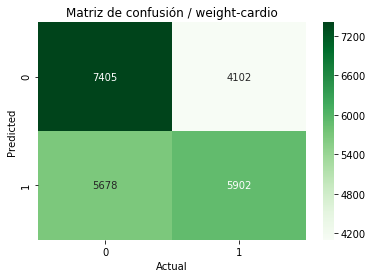

In [810]:
from sklearn.metrics import confusion_matrix
# ESPECIFICAMOS LAS ETIQUETAS QUE VAMOS A USAR PARA CLASIFICAR VERDADERO O FALSO
labels = [0, 1]
confusion_matrix(y_train,y_train_hat, labels = labels)

import seaborn as sns
cm = confusion_matrix(y_test,y_test_hat,labels)
sns.heatmap(cm, # PASAMOS LOS DATOS GENERADOS
annot=True, # QUEREMOS QUE HAGA ANOTACIONES (PONGA EL VALOR EN LAS CELDAS)
fmt='d', # FORMATO EN DIGITOS NO FLOTANTES
xticklabels=labels,
yticklabels=labels,
cmap='Greens')
plt.title('Matriz de confusión / weight-cardio')
plt.ylabel('Predicted')
plt.xlabel('Actual');

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("accuracy_score: ", accuracy_score(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

plt.savefig("weight_confusion_matrix.png")

In [811]:
cap_X = df['weight'].values.reshape(-1,1)
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

Observamos que del total de pacinentes 35021 no tienen cardiopatia frenta a 34979 que si tienen. La proporción es de 35021/34979 del 0.99%, prácticamente existen que de cada 10 pacientes, 5 tendrán y 5 no tendrán cardiopatía.

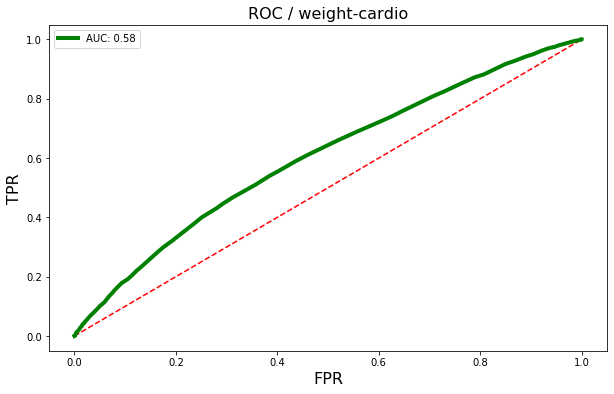

In [812]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--') # dibujamos una diagonal que nos marcarán el comportamiento promedio

# calulamos la predicción de que la probabilidad sea 1 o 0 de los datos de prueba
probs = clf.predict_proba(X_test)

probs = probs[:, 1] # cogemos solo los que tenga probabilidad 1 (es lo que nos interesa ver)
# usamos la función roc_curve pasándole los 'y' de prueba y las probabilidades calculadas
fpr, tpr, thresholds = roc_curve(y_test,probs)
# calculamos la precision de nuestro modelo
roc_auc = roc_auc_score(y_test, y_test_hat)

label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
# calculamos los parámetros necesarios
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC / weight-cardio', fontsize = 16)
plt.legend();

plt.savefig("weight_ROC.png")

La precisión de 0.58 indica que nuestro modelo no es muy bueno.

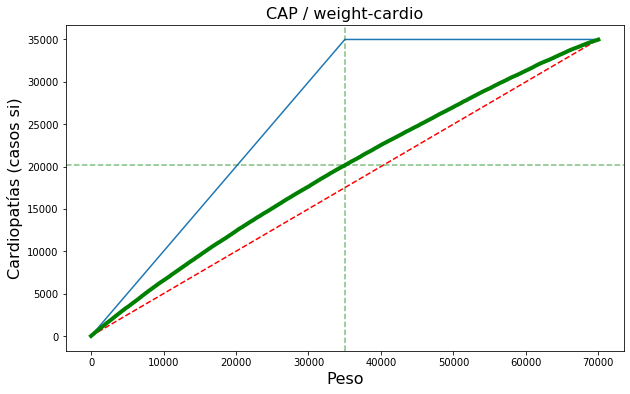

In [813]:
plt.figure(figsize = (10, 6))
plt.plot([0,70000], [0,35000], 'r--');

perfect_model = np.cumsum(np.repeat(1,35000))

perfect_model.resize(70000)
perfect_model[35000:] = 35000
perfect_model
plt.plot(perfect_model);

df['probs'] = clf.predict_proba(cap_X)[:, 1] 

df = df.sort_values(by='probs',ascending=False)
df.head()

probs = np.cumsum(df.cardio).values
probs
plt.plot(probs,c = 'g', label = label, linewidth = 4);

plt.xlabel('Peso', fontsize = 16)
plt.ylabel('Cardiopatías (casos si)', fontsize = 16)
plt.title('CAP / weight-cardio', fontsize = 16)

plt.axvline(x=35000, color='g', linestyle='--',alpha=0.5)
plt.axhline(y=probs[34999], color='g', linestyle='--',alpha=0.5);

probs[499]

plt.savefig("weight_CAP.png")

Podemos observar en la gráfica que cuando hemos atendido a la mitad de paciencientes ya hemos conseguido en torno al 57% de los casos que tendrñan cardiopatías con lo que el test es equivalente a aleatorio o peor.

## Variable 'ap_hi'
Spliting

In [814]:
# Tomamos primero la columna con los datos del ap_hi
X = df_reduced['ap_hi'].values.reshape(-1, 1)
y = df_reduced['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=103)

Score train:  0.7143009536813808
Score test:  0.711829167930004
Probabilidades:  [0.34666705 0.34666705 0.34666705 ... 0.45811114 0.04914498 0.57391045]


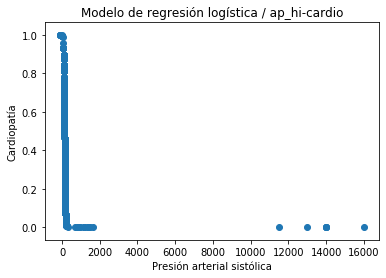

In [815]:
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

print("Score train: ", clf.score(X_train,y_train))
print("Score test: ", clf.score(X_test,y_test))
pro = clf.predict_proba(X_train)[:,0]
print("Probabilidades: ", pro)

plt.scatter(X_train,pro);
plt.title('Modelo de regresión logística / ap_hi-cardio')
plt.xlabel('Presión arterial sistólica')
plt.ylabel('Cardiopatía')

plt.savefig("ap_hi_regression.png")

accuracy_score:  0.711829167930004
              precision    recall  f1-score   support

           0       0.68      0.80      0.73     11507
           1       0.76      0.62      0.68     11580

    accuracy                           0.71     23087
   macro avg       0.72      0.71      0.71     23087
weighted avg       0.72      0.71      0.71     23087



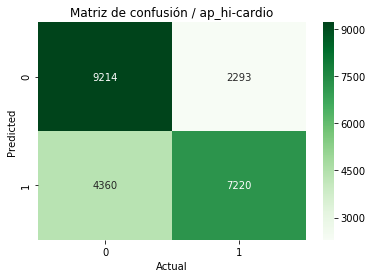

In [816]:
labels = [0, 1]
confusion_matrix(y_train,y_train_hat, labels = labels)

cm = confusion_matrix(y_test,y_test_hat,labels)
sns.heatmap(cm, # PASAMOS LOS DATOS GENERADOS
annot=True, # QUEREMOS QUE HAGA ANOTACIONES (PONGA EL VALOR EN LAS CELDAS)
fmt='d', # FORMATO EN DIGITOS NO FLOTANTES
xticklabels=labels,
yticklabels=labels,
cmap='Greens')
plt.title('Matriz de confusión / ap_hi-cardio')
plt.ylabel('Predicted')
plt.xlabel('Actual');

print("accuracy_score: ", accuracy_score(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

plt.savefig("ap_hi_confusion_matrix.png")

In [817]:
cap_X = df['ap_hi'].values.reshape(-1,1)
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

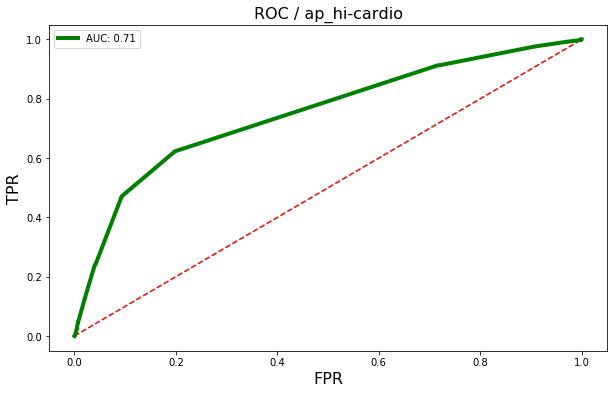

In [818]:
plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--') # dibujamos una diagonal que nos marcarán el comportamiento promedio

# calulamos la predicción de que la probabilidad sea 1 o 0 de los datos de prueba
probs = clf.predict_proba(X_test)

probs = probs[:, 1] # cogemos solo los que tenga probabilidad 1 (es lo que nos interesa ver)
# usamos la función roc_curve pasándole los 'y' de prueba y las probabilidades calculadas
fpr, tpr, thresholds = roc_curve(y_test,probs)
# calculamos la precision de nuestro modelo
roc_auc = roc_auc_score(y_test, y_test_hat)

label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
# calculamos los parámetros necesarios
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC / ap_hi-cardio', fontsize = 16)
plt.legend();

plt.savefig("ap_hi_ROC.png")

La precisión de 0.71 indica que nuestro modelo es regular.

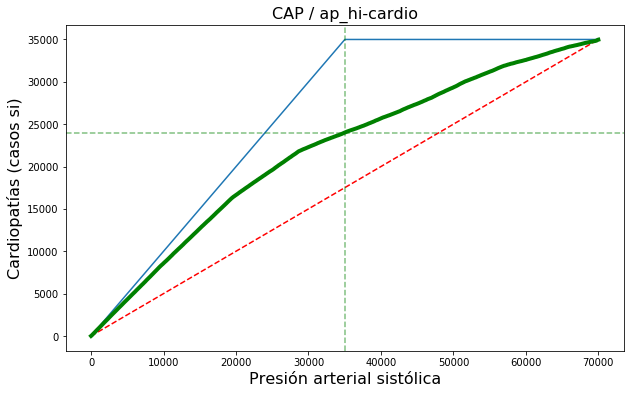

In [819]:
plt.figure(figsize = (10, 6))
plt.plot([0,70000], [0,35000], 'r--');

perfect_model = np.cumsum(np.repeat(1,35000))

perfect_model.resize(70000)
perfect_model[35000:] = 35000
perfect_model
plt.plot(perfect_model);

df['probs'] = clf.predict_proba(cap_X)[:, 1] 

df = df.sort_values(by='probs',ascending=False)
df.head()

probs = np.cumsum(df.cardio).values
probs
plt.plot(probs,c = 'g', label = label, linewidth = 4);

plt.xlabel('Presión arterial sistólica', fontsize = 16)
plt.ylabel('Cardiopatías (casos si)', fontsize = 16)
plt.title('CAP / ap_hi-cardio', fontsize = 16)

plt.axvline(x=35000, color='g', linestyle='--',alpha=0.5)
plt.axhline(y=probs[34999], color='g', linestyle='--',alpha=0.5);

probs[499]

plt.savefig("ap_hi_CAP.png")

Podemos observar en la gráfica que cuando hemos atendido a la mitad de paciencientes ya hemos conseguido en torno al 68% de los casos que tendrñan cardiopatías con lo que el test se puede decir que no es bueno.

## Variable 'ap_hi'
Spliting

In [820]:
# Tomamos primero la columna con los datos del ap_hi
X = df_reduced['ap_lo'].values.reshape(-1, 1)
y = df_reduced['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=103)

Score train:  0.5574022316571015
Score test:  0.5585827521982067
Probabilidades:  [0.50148717 0.50148717 0.50666888 ... 0.50666888 0.49682332 0.50666888]


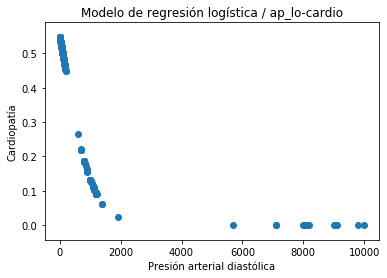

In [821]:
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

print("Score train: ", clf.score(X_train,y_train))
print("Score test: ", clf.score(X_test,y_test))
pro = clf.predict_proba(X_train)[:,0]
print("Probabilidades: ", pro)

plt.scatter(X_train,pro);
plt.title('Modelo de regresión logística / ap_lo-cardio')
plt.xlabel('Presión arterial diastólica')
plt.ylabel('Cardiopatía')

plt.savefig("ap_lo_regression.png")

accuracy_score:  0.5585827521982067
              precision    recall  f1-score   support

           0       0.53      0.97      0.69     11507
           1       0.84      0.15      0.25     11580

    accuracy                           0.56     23087
   macro avg       0.68      0.56      0.47     23087
weighted avg       0.68      0.56      0.47     23087



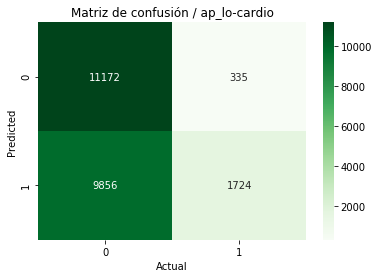

In [822]:
labels = [0, 1]
confusion_matrix(y_train,y_train_hat, labels = labels)

cm = confusion_matrix(y_test,y_test_hat,labels)
sns.heatmap(cm, # PASAMOS LOS DATOS GENERADOS
annot=True, # QUEREMOS QUE HAGA ANOTACIONES (PONGA EL VALOR EN LAS CELDAS)
fmt='d', # FORMATO EN DIGITOS NO FLOTANTES
xticklabels=labels,
yticklabels=labels,
cmap='Greens')
plt.title('Matriz de confusión / ap_lo-cardio')
plt.ylabel('Predicted')
plt.xlabel('Actual');

print("accuracy_score: ", accuracy_score(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

plt.savefig("ap_lo_confusion_matrix.png")

In [823]:
cap_X = df['ap_lo'].values.reshape(-1,1)
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

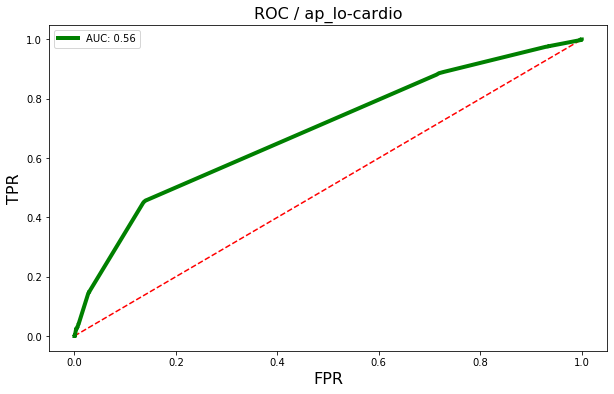

In [824]:
plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--') # dibujamos una diagonal que nos marcarán el comportamiento promedio

# calulamos la predicción de que la probabilidad sea 1 o 0 de los datos de prueba
probs = clf.predict_proba(X_test)

probs = probs[:, 1] # cogemos solo los que tenga probabilidad 1 (es lo que nos interesa ver)
# usamos la función roc_curve pasándole los 'y' de prueba y las probabilidades calculadas
fpr, tpr, thresholds = roc_curve(y_test,probs)
# calculamos la precision de nuestro modelo
roc_auc = roc_auc_score(y_test, y_test_hat)

label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
# calculamos los parámetros necesarios
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC / ap_lo-cardio', fontsize = 16)
plt.legend();

plt.savefig("ap_lo_ROC.png")

La precisión de 0.56 indica que nuestro modelo es malo.

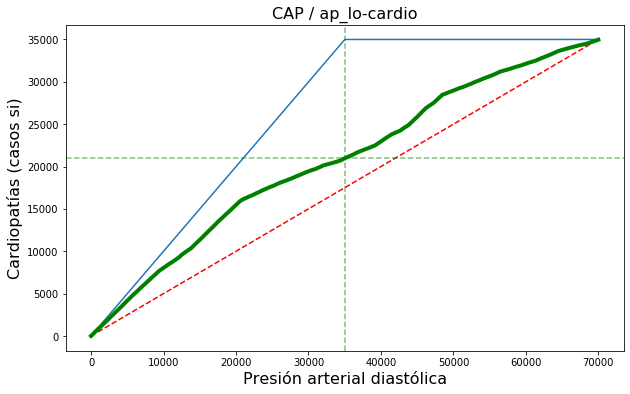

In [825]:
plt.figure(figsize = (10, 6))
plt.plot([0,70000], [0,35000], 'r--');

perfect_model = np.cumsum(np.repeat(1,35000))

perfect_model.resize(70000)
perfect_model[35000:] = 35000
perfect_model
plt.plot(perfect_model);

df['probs'] = clf.predict_proba(cap_X)[:, 1] 

df = df.sort_values(by='probs',ascending=False)
df.head()

probs = np.cumsum(df.cardio).values
probs
plt.plot(probs,c = 'g', label = label, linewidth = 4);

plt.xlabel('Presión arterial diastólica', fontsize = 16)
plt.ylabel('Cardiopatías (casos si)', fontsize = 16)
plt.title('CAP / ap_lo-cardio', fontsize = 16)

plt.axvline(x=35000, color='g', linestyle='--',alpha=0.5)
plt.axhline(y=probs[34999], color='g', linestyle='--',alpha=0.5);

probs[499]

plt.savefig("ap_lo_CAP.png")

Podemos observar en la gráfica que cuando hemos atendido a la mitad de pacientes ya hemos conseguido en torno al 60% de los casos que tendrán cardiopatías con lo que el test se puede decir que es malo.